# Get data from Amazon product co-purchasing network metadata

In [1]:
from src.parser import *
import simplejson
import subprocess

from src.utils import select_from_fulldump
from src.insert_data import insert_from_dict_gen

from src.query import q_a

In [2]:
file_path = "data/amazon-meta.txt.gz"
result = subprocess.Popen('wc -l data/amazon-meta.txt.gz', shell=True, stdout=subprocess.PIPE)
n_lines = int([l for l in result.stdout][0].decode().split()[0])

dumps = [e for e in parse(file_path, total=n_lines) if e]
n_dumps = len(dumps)

print('lines:', n_lines)
print('number of dumps:', n_dumps)
# print(simplejson.dumps(dumps[1], indent=2))

15010574it [00:39, 384383.15it/s]

lines: 770519
number of dumps: 548552


# insert dumps into psql

In [32]:
!python3 src/create_schema.py

# number os dumps
n = n_dumps//4

prods = select_from_fulldump(dumps, 'products', n)
cats = select_from_fulldump(dumps, 'categories', n)
revs = select_from_fulldump(dumps, 'reviews', n)

insert_from_dict_gen('products', prods)
insert_from_dict_gen('categories', cats)
insert_from_dict_gen('reviews', revs)

137138it [00:12, 10676.81it/s]
100%|██████████| 51/51 [00:00<00:00, 7672.78it/s]


# Dash BOard

(a) Dado produto, listar os 5 comentários mais úteis e com maior avaliação e os 5 comentários mais úteis e com menor avaliação

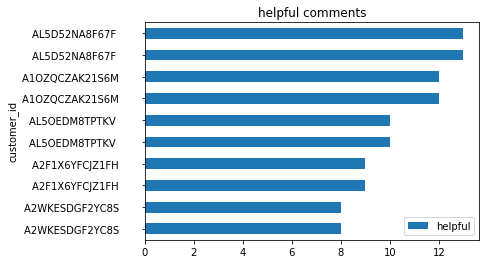

In [46]:
product_id = 8
a = q_a(product_id)
a[::-1].plot.barh(title='helpful comments', x='customer_id', y='helpful');